# ARC Additions: Notebook of new functions and testing / benchmarking to verify parameters and sources

Goal: Transfer hyperfine atomic physics functions from internal Matlab toolbox to ARC.

JP, University of Strathclyde (2020)

In [1]:
#Configure Environment

# NOTE: Uncomment following two lines ONLY if you are not using installation via pip
import sys, os
sys.path.insert(0,".")  # add current directory in look up path for Python packages

from arc import *
from arc.beta import *  # This is necessary for running this notebook before official release of ARC 3.0.0

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

cs = Cesium();
rb87 = Rubidium87();

## Check ARC Parameters for D1/2 and inverted (n+1)P_{1/2,3/2}

 + New function "[A,B] = self.getHFSCoefficients(self,n, l, j, s=None)" added to return HFS constants in Hz. This is currently using hard-coded values for Cs and Rb, but has been written as a place-holder for adding in a table. Refernce [5] and [6] have useful reference info


### Hyperfine Structure Functions

 + [A,B] = atm.getHFSCoefficients(n,l,j)
 
Returns HFS constants in Hz. This is currently using hard-coded values for Cs and Rb, but has been written as a place-holder for adding in a table. Refernce [5] and [6] have useful reference info.

 + getHFSEnergyShift(j,f,A,B)
 
Returns HFS Energy shift from centre of mass.

\begin{equation}
\Delta E_\mathrm{hfs} = \frac{A}{2}K+B\frac{\frac{3}{2}K(K+1)-2I(I+1)J(J+1)}{2I(2I-1)2J(2J-1)},
\end{equation}
where $K=F(F+1)-I(I+1)-J(J+1)$.

##### References
[1] Steck

[2] M. Ortiz and J. Campos, J. Quant. Spectrosc. Radiat. Transfer 26, 107 (1981)

[3] Vasilyev, A. A. and Savukov, I. M. and Safronova, M. S. and Berry, H. G., PRA 66, 020101 (2002)

[4] M. S. Safronova, Carl J. Williams, and Charles W. Clark, PRA 69, 022509 (2004)

[5] D. Feiertag, A. Sahm, and G. zu Putlitz, Z. Phys. 255, 93 (1972)

[6] E. Arrimondo, M. Inguscio and P. Violino, Rev. Mod. Phys. 49, 31 (1977)


In [6]:
print("Cs Numbers")
print("==========")
print("State Lifetimes:")
#Lifetime Comparison -->
print("\t[1] : Tau6P1/2 = 34.894(44) ns, ARC = %2.3f ns (%2.2f %% error)" % (cs.getStateLifetime(6,1,0.5)*1e9,(cs.getStateLifetime(6,1,0.5)*1e9-34.894)/34.894*100))
print("\t[1] : Tau6P3/2 = 30.473(44) ns, ARC = %2.3f ns (%2.2f %% error)" % (cs.getStateLifetime(6,1,1.5)*1e9,(cs.getStateLifetime(6,1,1.5)*1e9-30.473)/30.473*100))
print("\t[2] : Tau7P1/2 = 155 ns, ARC = %2.3f ns (%2.2f %% error)" % (cs.getStateLifetime(7,1,0.5)*1e9,(cs.getStateLifetime(7,1,0.5)*1e9-155)/155*100))
print("\t[2] : Tau7P3/2 = 133 ns, ARC = %2.3f ns (%2.2f %% error)" % (cs.getStateLifetime(7,1,1.5)*1e9,(cs.getStateLifetime(7,1,1.5)*1e9-133)/133*100))
#Matrix Elements
print("Matrix Elements")
r = 4.5003;rm = cs.getReducedMatrixElementJ(6,0,0.5,6,1,0.5)
print("\t[1] : <6S1/2||er||6P1/2> = %1.4f, ARC = %2.4f ns (%2.2f %% error)" % (r,rm,(rm-r)/r*100))
r = 6.3338;rm = cs.getReducedMatrixElementJ(6,0,0.5,6,1,1.5)
print("\t[1] : <6S1/2||er||6P3/2> = %1.4f, ARC = %2.4f ns (%2.2f %% error)" % (r,rm,(rm-r)/r*100))
r = 0.2757;rm = cs.getReducedMatrixElementJ(6,0,0.5,7,1,0.5)
print("\t[3] : <6S1/2||er||7P1/2> = %1.4f, ARC = %2.4f ns (%2.2f %% error)" % (r,rm,(rm-r)/r*100))
r = 0.5856;rm = cs.getReducedMatrixElementJ(6,0,0.5,7,1,1.5)
print("\t[3] : <6S1/2||er||7P3/2> = %1.4f, ARC = %2.4f ns (%2.2f %% error)" % (r,rm,(rm-r)/r*100))
#Hyperfine Splitting Coefficients
print("Hyperfine Constants")
[A,B]=cs.getHFSCoefficients(6,0,0.5)
omegaQ = 4*A
print("\t[1] : 6S1/2 A = %1.4f MHz,B = %1.4f MHz" % (A*1e-6,B*1e-6))
[A,B]=cs.getHFSCoefficients(6,1,0.5)
print("\t[1] : 6P1/2 A = %1.4f MHz,B = %1.4f MHz" % (A*1e-6,B*1e-6))
[A,B]=cs.getHFSCoefficients(6,1,1.5)
print("\t[1] : 6P3/2 A = %1.4f MHz,B = %1.4f MHz" % (A*1e-6,B*1e-6))
[A,B]=cs.getHFSCoefficients(7,1,0.5)
print("\t[5] : 7P1/2 A = %1.4f MHz,B = %1.4f MHz" % (A*1e-6,B*1e-6))
[A,B]=cs.getHFSCoefficients(7,1,1.5)
print("\t[6] : 7P3/2 A = %1.4f MHz,B = %1.4f MHz" % (A*1e-6,B*1e-6))

print("\nVerify getHFSCoefficients(j,f,A,B) using Cs 6P3/2")
[A,B]=cs.getHFSCoefficients(6,1,1.5)
Ehfs=cs.getHFSEnergyShift(1.5,5,A,B)
print("\t[1] : 6P3/2 F=5: Ehfs = +263.81 MHz --> ARC Ehfs = %f MHz" % (Ehfs*1e-6))
Ehfs=cs.getHFSEnergyShift(1.5,4,A,B)
print("\t[1] : 6P3/2 F=4: Ehfs =  +12.815 MHz --> ARC Ehfs = %f MHz" % (Ehfs*1e-6))
Ehfs=cs.getHFSEnergyShift(1.5,3,A,B)
print("\t[1] : 6P3/2 F=3: Ehfs = -188.44 MHz --> ARC Ehfs = %f MHz" % (Ehfs*1e-6))
Ehfs=cs.getHFSEnergyShift(1.5,2,A,B)
print("\t[1] : 6P3/2 F=2: Ehfs = -339.64 MHz --> ARC Ehfs = %f MHz" % (Ehfs*1e-6))


#Clock Frequency
print("\n\t[1] : 6S1/2 Clock Frequency = 9.192631770 GHz --> ARC = %f GHz (%2.2f %% error)" % (omegaQ*1e-9,(omegaQ-9.192631770e9)/9.192631770e9*100))

print("\nRb Numbers")
print("==========")
print("State Lifetimes:")
#Lifetime Comparison -->
print("\t[1] : Tau5P1/2 = 27.70(4) ns, ARC = %2.3f ns (%2.2f %% error)" % (rb87.getStateLifetime(5,1,0.5)*1e9,(rb87.getStateLifetime(5,1,0.5)*1e9-27.70)/27.70*100))
print("\t[1] : Tau5P3/2 = 26.24(4) ns, ARC = %2.3f ns (%2.2f %% error)" % (rb87.getStateLifetime(5,1,1.5)*1e9,(rb87.getStateLifetime(5,1,1.5)*1e9-26.24)/26.24*100))
print("\t[4] : Tau6P1/2 = 125 ns, ARC = %2.3f ns (%2.2f %% error)" % (rb87.getStateLifetime(6,1,0.5)*1e9,(rb87.getStateLifetime(6,1,0.5)*1e9-125)/125*100))
print("\t[4] : Tau6P3/2 = 112 ns, ARC = %2.3f ns (%2.2f %% error)" % (rb87.getStateLifetime(6,1,1.5)*1e9,(rb87.getStateLifetime(6,1,1.5)*1e9-112)/112*100))
#Matrix Elements
print("Matrix Elements")
r = 0.333;rm = rb87.getReducedMatrixElementJ(5,0,0.5,6,1,0.5)
print("\t[4] : <5S1/2||er||6P1/2> = %1.4f, ARC = %2.4f ns (%2.2f %% error)" % (r,rm,(rm-r)/r*100))
r = 0.541;rm = rb87.getReducedMatrixElementJ(5,0,0.5,6,1,1.5)
print("\t[4] : <5S1/2||er||6P3/2> = %1.4f, ARC = %2.4f ns (%2.2f %% error)" % (r,rm,(rm-r)/r*100))
print("Hyperfine Constants")
[A,B]=rb87.getHFSCoefficients(5,0,0.5)
omegaQ = (0.5+rb87.I)*A
print("\t[1] : 5S1/2 A = %1.4f MHz,B = %1.4f MHz" % (A*1e-6,B*1e-6))
[A,B]=rb87.getHFSCoefficients(5,1,0.5)
print("\t[1] : 5P1/2 A = %1.4f MHz,B = %1.4f MHz" % (A*1e-6,B*1e-6))
[A,B]=rb87.getHFSCoefficients(5,1,1.5)
print("\t[1] : 5P3/2 A = %1.4f MHz,B = %1.4f MHz" % (A*1e-6,B*1e-6))
[A,B]=rb87.getHFSCoefficients(6,1,0.5)
print("\t[5] : 6P1/2 A = %1.4f MHz,B = %1.4f MHz" % (A*1e-6,B*1e-6))
[A,B]=rb87.getHFSCoefficients(6,1,1.5)
print("\t[6] : 6P3/2 A = %1.4f MHz,B = %1.4f MHz" % (A*1e-6,B*1e-6))

#Clock Frequency
print("\n\t[1] : 5S1/2 Clock Frequency =  6.83468261090429 GHz --> ARC = %f GHz (%2.2f %% error)" % (omegaQ*1e-9,(omegaQ-6.83468261090429e9)/6.83468261090429e9*100))

Cs Numbers
State Lifetimes:
	[1] : Tau6P1/2 = 34.894(44) ns, ARC = 35.070 ns (0.51 % error)
	[1] : Tau6P3/2 = 30.473(44) ns, ARC = 30.569 ns (0.32 % error)
	[2] : Tau7P1/2 = 155 ns, ARC = 153.914 ns (-0.70 % error)
	[2] : Tau7P3/2 = 133 ns, ARC = 130.788 ns (-1.66 % error)
Matrix Elements
	[1] : <6S1/2||er||6P1/2> = 4.5003, ARC = 4.4890 ns (-0.25 % error)
	[1] : <6S1/2||er||6P3/2> = 6.3338, ARC = 6.3238 ns (-0.16 % error)
	[3] : <6S1/2||er||7P1/2> = 0.2757, ARC = 0.2790 ns (1.20 % error)
	[3] : <6S1/2||er||7P3/2> = 0.5856, ARC = 0.5760 ns (-1.64 % error)
Hyperfine Constants
	[1] : 6S1/2 A = 2298.1579 MHz,B = 0.0000 MHz
	[1] : 6P1/2 A = 291.9201 MHz,B = 0.0000 MHz
	[1] : 6P3/2 A = 50.2750 MHz,B = -0.5300 MHz
	[5] : 7P1/2 A = 94.3500 MHz,B = 0.0000 MHz
	[6] : 7P3/2 A = 16.6500 MHz,B = -0.1500 MHz

Verify getHFSCoefficients(j,f,A,B) using Cs 6P3/2
	[1] : 6P3/2 F=5: Ehfs = +263.81 MHz --> ARC Ehfs = 263.811250 MHz
	[1] : 6P3/2 F=4: Ehfs =  +12.815 MHz --> ARC Ehfs = 12.814821 MHz
	[1] : 6P

### Angular Momentum Functions

 + getSphericalDipoleMatrixElement(j1,mj1,j2,mj2,q)
 
    Angular part of spherical matrix element $A$ in units of reduced matrix element $\langle j\vert\vert\mu\vert\vert j'\rangle$ (Wigner-Eckart decomposition)
 
\begin{equation}
\langle j m_j\vert \mu_q \vert j' m_j' \rangle = (-1)^{j-m_j}\begin{pmatrix}j&1&j'\\-m_j&-q&m_j'\end{pmatrix}\langle j\vert\vert\mu\vert\vert j'\rangle = A\langle j\vert\vert\mu\vert\vert j'\rangle, 
\end{equation}
 
 + _reducedMatrixElementFJ(j1,f1,j2,f2)
 
 Reduced dipole matrix element $\langle f \vert\vert\mu\vert\vert f'\rangle$ in units of $\langle j\vert\vert\mu\vert\vert j'\rangle$
 
 \begin{equation}
\langle f \vert\vert\mu\vert\vert f'\rangle = (-1)^{j+I+f'+1}\sqrt{(2f+1)(2f'+1)}
\begin{Bmatrix}f&1&f'\\j'&I&j\end{Bmatrix}\langle j\vert\vert\mu\vert\vert j'\rangle, \label{eq:frf}
\end{equation}

 + getSphericalMatrixElementHFStoFS(j1,f1,mf1,j2,mj2,q)
 
 Angular coefficient of matrix element $\langle jfm_f \vert er_q\vert j'f'm_f'\rangle$ for coupling to state without resolved HFS, in units of $\langle j\vert\vert\mu\vert\vert j'\rangle$
 
\begin{align}
\langle f,m_f \vert\mu_q\vert j',m_j'\rangle &=\displaystyle\sum_{f'}C_{j'm_j'I(m_f+q-m_j')}^{f'(m_f+q)}(-1)^{f-m_f}\begin{pmatrix}f&1&f'\\-m_f&-q&m_f+q\end{pmatrix}\\&
\times(-1)^{j+I+f'+1}\sqrt{(2f+1)(2f'+1)}
\begin{Bmatrix}f&1&f'\\j'&I&j\end{Bmatrix}\langle j\vert\vert\mu\vert\vert j'\rangle
\end{align}

 + getDipoleMatrixElementHFStoFS(n1,l1,j1,f1,mf1,n2,l2,j2,mj2,q)
 
 Full dipole matrix element $\langle jfm_f \vert er_q\vert j'f'm_f'\rangle$ for coupling to state without resolved HFS, in units of $ea_0$
 
\begin{align}
\langle f,m_f \vert\mu_q\vert j',m_j'\rangle &=\displaystyle\sum_{f'}C_{j'm_j'I(m_f+q-m_j')}^{f'(m_f+q)}(-1)^{f-m_f}\begin{pmatrix}f&1&f'\\-m_f&-q&m_f+q\end{pmatrix}\\&
\times(-1)^{j+I+f'+1}\sqrt{(2f+1)(2f'+1)}
\begin{Bmatrix}f&1&f'\\j'&I&j\end{Bmatrix}\langle j\vert\vert\mu\vert\vert j'\rangle
\end{align}

 + getBranchingRatio(jg,fg,mfg,je,fe,mfe)
 
 Branching ratio $b$ for fraction of spontaneous decay from $\vert{j_e,f_e,m_{f_e}}\rangle\rightarrow\vert{j_g,f_g,m_{f_g}}\rangle$.
 
\begin{align}
b = \displaystyle\sum_q (2j_e+1)\left(\begin{matrix}f_g & 1 & f_e \\ -m_{f_g} & q & m_{f_e}\end{matrix}\right)^2 \vert \langle j_e,f_e\vert \vert er \vert\vert j_g,f_g\rangle\vert^2
\end{align}

 + getSaturationIntensity(ng,lg,jg,fg,mfg,ne,fe,je,fe,mfe)
 
 Returns saturation intenstiy $I_\mathrm{sat}$ for transition from $\vert{j_g,f_g,m_{f_g}}\rangle\rightarrow\vert{j_e,f_e,m_{f_e}}\rangle$ in units of W/m$^2$.
 
\begin{align}
I_\mathrm{sat} = \frac{c\epsilon_0\Gamma^2\hbar^2}{4\vert \epsilon_q\cdot\mathrm{d}\vert^2}
\end{align}

 + getSaturationIntensityIsotropic(ng,lg,jg,fg,ne,fe,je,fe)
 
 Returns saturation intenstiy $I_\mathrm{sat}$ averaged over transiton from $f_g\rightarrow f_e$ for isotropic polarisation in units of W/m$^2$.
 
\begin{align}
I_\mathrm{sat,iso} = \frac{c\epsilon_0\Gamma^2\hbar^2}{4\vert \mathrm{d_{iso}}\vert^2},
\end{align}
where $\vert \mathrm{d_{iso}}\vert^2$ is the isotropic dipole moment obtained by averaging over all possible transitions and polarisations.
\begin{align}
\vert d_{iso} \vert^2 = \frac{1}{3(2fg+1)}\displaystyle\sum_{q,m_{f_g}}\vert\langle ng,lg,jg,fg,mfg|er|ne,le,je,fe,mfg+q\rangle\vert^2
\end{align}

In [3]:
#Test sph=atm.getSphericalDipoleMatrixElement(j1,mj1,j2,mj2,q)
#============================================================
print("\nTest sph=atm.getSphericalDipoleMatrixElement(j1,mj1,j2,mj2,q):")
print("==============================================================")
print("Spherical matrix element in units of reduced matrix element <j'||er||j> for j and  <f'||er||f> for f")
sph = cs.getSphericalDipoleMatrixElement(0.5,0.5,1.5,1.5,1)
print("|1/2,1/2> to |3/2,3/2> for q=1 (sigma+) : sph = 1/2 = %2.5f, sph = %2.5f" %(1/2,sph))
sph = cs.getSphericalDipoleMatrixElement(4,4,5,5,1)
print("|4,4> to |5,5> for q=1 (sigma+) : sph = sqrt{1/11} = %2.5f, sph = %2.5f" %(np.sqrt(1/11),sph))
sph = cs.getSphericalDipoleMatrixElement(4,4,4,4,0)
print("|4,4> to |4,4> for q=0 (pi) : sph = sqrt{4/45} = %2.5f, sph = %2.5f" %(np.sqrt(4/45),sph))
sph = cs.getSphericalDipoleMatrixElement(4,4,3,3,-1)
print("|4,4> to |3,3> for q=-1 (sigma-) : sph = 1/3 = %2.5f, sph = %2.5f" %(1/3,sph))

#Test sph=atm.getSphericalMatrixElementHFStoFS(j1,f1,mf1,j2,mj2,q)
#=================================================================
print("\nTest sph=atm.getSphericalMatrixElementHFStoFS(j1,f1,mf1,j2,mj2,q):")
print("==================================================================")
print("Spherical matrix element in units of reduced matrix element <j'||er||j'>")
sph = cs.getSphericalMatrixElementHFStoFS(1.5,5,5,0.5,0.5,-1)
print("Cs P3/2 |5,5> to S1/2 |1/2,1/2> for q=-1 (sigma-) : sph = 1/2 = %2.5f, sph = %2.5f" %(1/2,sph))
sph = cs.getSphericalMatrixElementHFStoFS(1.5,5,1,0.5,0.5,1)
print("Cs P3/2 |5,1> to S1/2 |1/2,1/2> for q=1 (sigma+) : sph = sqrt(1/40) = %2.5f, sph = %2.5f" %(np.sqrt(1/40),sph))
sph = cs.getSphericalMatrixElementHFStoFS(1.5,5,1,0.5,0.5,0)
print("Cs P3/2 |5,1> to S1/2 |1/2,1/2> for q=0 (pi) : sph = sqrt(1/12) = %2.5f, sph = %2.5f" %(np.sqrt(1/12),sph))
sph = cs.getSphericalMatrixElementHFStoFS(1.5,5,1,0.5,0.5,-1)
print("Cs P3/2 |5,1> to S1/2 |1/2,1/2> for q=-1 (sigma-) : sph = sqrt(1/24) = %2.5f, sph = %2.5f" %(np.sqrt(1/24),sph))

#Test sph=atm.getDipoleMatrixElementHFStoFS(j1,f1,mf1,j2,mj2,q)
#==============================================================
print("\nTest rme=atm.getDipoleMatrixElementHFStoFS(n1,l1,j1,f1,mf1,n2,l2,j2,mj2,q):")
print("=============================================================================")
print("Spherical matrix element in ea0")
rmeJ = cs.getReducedMatrixElementJ(6,1,1.5,80,0,0.5)
print("Cs <6P3/2||er||80S1/2> = 0.0086 = %f" %(rmeJ))
rme = cs.getDipoleMatrixElementHFStoFS(6,1,1.5,5,5,80,0,0.5,0.5,-1)
print("Cs 6P3/2 |5,5> to 80S1/2 |1/2,1/2> for q=-1 (sigma-) : 0.0043 ea0, rme = %f ea0" %(rme))
rme = cs.getDipoleMatrixElementHFStoFS(6,1,1.5,5,1,80,0,0.5,0.5,-1)
print("Cs 6P3/2 |5,1> to 80S1/2 |1/2,1/2> for q=-1 (sigma-) : 0.0018 ea0, rme = %f ea0" %(rme))

rmeJ = cs.getReducedMatrixElementJ(6,1,1.5,80,2,2.5)
print("Cs <6P3/2||er||80D5/2> = -0.0259 = %f" %(rmeJ))
rme = cs.getDipoleMatrixElementHFStoFS(6,1,1.5,5,5,80,2,2.5,2.5,1)
print("Cs 6P3/2 |5,5> to 80D5/2 |5/2,5/2> for q=+1 (sigma+) : -0.0106 ea0, rme = %f ea0" %(rme))

sph = cs.getSphericalMatrixElementHFStoFS(1.5,5,5,2.5,2.5,1)
print("Cs P3/2 |5,5> to D5/2 |5/2,5/2> for q=+1 (sigma+) : sph = sqrt(1/6) = %2.5f, sph = %2.5f" %(np.sqrt(1/6),sph))


#Test getBranchingRatio(jg,fg,mfg,je,fe,mfe)
#===========================================
print("\nTest br=atm.getBranchingRatio(jg,fg,mfg,je,fe,mfe):")
print("===================================================")
#Cs P3/2 |5,5> to S1/2|4,4> = 1
br = cs.getBranchingRatio(0.5,4,4,1.5,5,5)
print("Cs P3/2 |5,5> to S1/2|4,4> = 1, br = %2.5f" %(br))
#Cs P3/2 |5,4> to S1/2|4,4> = 1/5
br = cs.getBranchingRatio(0.5,4,4,1.5,5,4)
print("Cs P3/2 |5,4> to S1/2|4,4> = 1/5 = %2.5f, br = %2.5f" %(1/5,br))
#Cs P3/2 |5,4> to S1/2|4,3> = 4/5
br = cs.getBranchingRatio(0.5,4,3,1.5,5,4)
print("Cs P3/2 |5,4> to S1/2|4,3> = 4/5 = %2.5f, br = %2.5f" %(4/5,br))
#Cs P3/2 |4,4> to S1/2|4,4> = 7/15
br = cs.getBranchingRatio(0.5,4,4,1.5,4,4)
print("Cs P3/2 |4,4> to S1/2|4,4> = 7/15 = %2.5f, br = %2.5f" %(7/15,br))
#Cs P3/2 |4,4> to S1/2|4,3> = 7/60
br = cs.getBranchingRatio(0.5,4,3,1.5,4,4)
print("Cs P3/2 |4,4> to S1/2|4,3> = 7/60 = %2.5f, br = %2.5f" %(7/60,br))
#Cs P3/2 |4,4> to S1/2|3,3> = 7/60
br = cs.getBranchingRatio(0.5,3,3,1.5,4,4)
print("Cs P3/2 |4,4> to S1/2|3,3> = 5/12 = %2.5f, br = %2.5f" %(5/12,br))


#Test getSaturationIntensity(ng,lg,jg,fg,mfg,ne,le,je,fe,mfe)
#============================================================
print("\nTest Is=atm.getSaturationIntensity(ng,lg,jg,fg,mfg,ne,le,je,fe,mfe):")
print("====================================================================")
#Cs P3/2 |5,5> to S1/2|4,4> = 11 W/m^2
Is = cs.getSaturationIntensity(6,0,0.5,4,4,6,1,1.5,5,5)
print("Cs 6S1/2|4,4> to 6P3/2 |5,5> Is = 11 W/m^2, br = %2.5f W/m^2" %(Is))
Is = cs.getSaturationIntensity(6,0,0.5,4,0,6,1,1.5,5,0)
print("Cs 6S1/2|4,0> to 6P3/2 |5,0> Is = 19.8 W/m^2, br = %2.5f W/m^2" %(Is))

#Test getSaturationIntensityIsotropic(ng,lg,jg,fg,ne,le,je,fe)
#============================================================
print("\nTest Is=atm.getSaturationIntensityIsotropic(ng,lg,jg,fg,ne,le,je,fe):")
print("======================================================================")
#Cs P3/2 |5,5> to S1/2|4,4> = 11 W/m^2
Is = cs.getSaturationIntensityIsotropic(6,0,0.5,4,6,1,1.5,5)
print("Cs 6S1/2 F=4 to 6P3/2 F=5 Is_ISO = 27.059 W/m^2 [1], Is_ISO = %2.5f W/m^2" %(Is))
Is = cs.getSaturationIntensityIsotropic(6,0,0.5,4,6,1,1.5,4)
print("Cs 6S1/2 F=4 to 6P3/2 F=4 Is_ISO = 56.69 W/m^2, Is_ISO = %2.5f W/m^2" %(Is))



Test sph=atm.getSphericalDipoleMatrixElement(j1,mj1,j2,mj2,q):
Spherical matrix element in units of reduced matrix element <j'||er||j> for j and  <f'||er||f> for f
|1/2,1/2> to |3/2,3/2> for q=1 (sigma+) : sph = 1/2 = 0.50000, sph = 0.50000
|4,4> to |5,5> for q=1 (sigma+) : sph = sqrt{1/11} = 0.30151, sph = 0.30151
|4,4> to |4,4> for q=0 (pi) : sph = sqrt{4/45} = 0.29814, sph = 0.29814
|4,4> to |3,3> for q=-1 (sigma-) : sph = 1/3 = 0.33333, sph = 0.33333

Test sph=atm.getSphericalMatrixElementHFStoFS(j1,f1,mf1,j2,mj2,q):
Spherical matrix element in units of reduced matrix element <j'||er||j'>
Cs P3/2 |5,5> to S1/2 |1/2,1/2> for q=-1 (sigma-) : sph = 1/2 = 0.50000, sph = 0.50000
Cs P3/2 |5,1> to S1/2 |1/2,1/2> for q=1 (sigma+) : sph = sqrt(1/40) = 0.15811, sph = 0.15811
Cs P3/2 |5,1> to S1/2 |1/2,1/2> for q=0 (pi) : sph = sqrt(1/12) = 0.28868, sph = 0.28868
Cs P3/2 |5,1> to S1/2 |1/2,1/2> for q=-1 (sigma-) : sph = sqrt(1/24) = 0.20412, sph = 0.20412

Test rme=atm.getDipoleMatrixElement

## Ground-State Raman Transitions

<img src="doc/GroundStateRaman.png" width=250/>

We consider here the case of two-photon ground-state Raman transitions from $\vert 0 \rangle = \vert f_0,m_{f_0}\rangle$ to $\vert 1 \rangle = \vert f_1,m_{f_1}\rangle$ via an intermediate excited state $\vert e\rangle = \vert f_e,m_{f_e}\rangle$. In the rotating wave approximation, the Hamiltonian can be written as

\begin{equation}
\mathcal{H} = \hbar\begin{pmatrix} 0 & \Omega^a_{0\rightarrow f_e}/2 & 0 \\\Omega^a_{0\rightarrow f_e}/2 & -\Delta & \Omega^b_{1\rightarrow f_e}/2 \\ 0 & \Omega^b_{1\rightarrow f_e}/2 & -\delta\end{pmatrix},
\end{equation}

where $\Omega^a_{0\rightarrow f_e}$ is the Rabi frequency from $\vert 0\rangle\rightarrow\vert e\rangle$ due to laser A and $\Omega^b_{1\rightarrow f_e}$ is the Rabi frequency from $\vert 1\rangle\rightarrow\vert e\rangle$ due to laser B, $\Delta=(\Delta_a+\Delta_a)/2$ is the average detuning from the intermediate state and $\delta=\Delta_a-\Delta_b$ is the two-photon detuning.

In the limit $\Delta \gg \Omega^a,\Omega^b,\Gamma_e$ the intermediate excited state can be adiabatically elliminiated leading to an effective two-photon Rabi frequency $\Omega_R = \Omega^a\Omega^b/2\Delta$ and an effective detuning 
$\delta_\mathrm{eff}=\delta+\Delta_\mathrm{AC}$ where $\Delta_\mathrm{AC}$ is the differential Stark shift given by

\begin{equation}
\Delta_\mathrm{AC} = \frac{\vert\Omega^b_{0\rightarrow f_e}\vert^2}{4\Delta} - \frac{\vert\Omega^a_{1\rightarrow f_e}\vert^2}{4\Delta}.
\end{equation}

On the two-photon transition ($\delta_\mathrm{eff}=0$), the probability of spontanteous emission during a $\pi$-pulse can be evaluated from $P_\mathrm{sc}=\Gamma_e\rho_e\tau_\pi$, where $\tau_\pi=\pi/\Omega_R$ is the $\pi$-pulse duration and $\rho_e$ is the excited state population given by

\begin{equation}
\rho_e = \frac{1}{2}\left(\frac{\vert\Omega^a_{0\rightarrow f_e}\vert^2}{2\Delta^2}+\frac{\vert\Omega^b_{1\rightarrow f_e}\vert^2}{2\Delta^2}\right).
\end{equation}

For a multi-level atom, the terms describing Raman transition, diffrential AC Stark shift and scattering probability must be calculated by summing over the $\vert f_e,m_{f_e}\rangle$ states of the intermediate excited state. Additionally, for transitions between hyperfine ground states separated by frequency $\omega_{01}$ we must also account for the off-resonant AC Stark shift and scattering terms arising from laser A acting on $\vert 1 \rangle$ with detuning $\Delta'=\Delta+\omega_{01}$ and laser B acting on $\vert 0 \rangle$ with detuning $\Delta'=\Delta-\omega_{01}$. 

\begin{align}
\Omega_R&=\displaystyle\sum_{f_e,m_{f_e}}\frac{\Omega^a_{0\rightarrow f_e}\Omega^b_{1\rightarrow f_e}}{2(\Delta-\Delta_{f_e})}\\
\Delta_{\mathrm{AC}} &= \displaystyle\sum_{f_e,m_{f_e}}\left[\frac{\vert\Omega^a_{0\rightarrow f_e}\vert^2-\vert\Omega^b_{1\rightarrow f_e}\vert^2}{4(\Delta-\Delta_{f_e})}+\frac{\vert\Omega^a_{1\rightarrow f_e}\vert^2}{4(\Delta+\omega_{01}-\Delta_{f_e})}-\frac{\vert\Omega^b_{0\rightarrow f_e}\vert^2}{4(\Delta-\omega_{01}-\Delta_{f_e})}\right],\\
P_\mathrm{sc} &= \frac{\Gamma_et_\pi}{2}\displaystyle\sum_{f_e,m_{f_e}}\left[\frac{\vert\Omega^a_{0\rightarrow f_e}\vert^2}{2(\Delta-\Delta_{f_e})^2}+\frac{\vert\Omega^b_{1\rightarrow f_e}\vert^2}{2(\Delta-\Delta_{f_e})^2}+\frac{\vert\Omega^a_{1\rightarrow f_e}\vert^2}{4(\Delta+\omega_{01}-\Delta_{f_e})^2}+\frac{\vert\Omega^b_{0\rightarrow f_e}\vert^2}{4(\Delta-\omega_{01}-\Delta_{f_e})^2}\right],
\end{align}

### ARC Implementation

 + [OmegaR,AC,Psc] = groundstateRamanTransition(Pa,wa,qa,Pb,wb,qb,Delta,f0,mf0,f1,mf1,ne,le,je)
 
    Returns two-photon Rabi frequency $\Omega_R$, differential AC Starkshift $\Delta_\mathrm{AC}$ and scattering probability $P_\mathrm{sc}$ for transition from $\vert f_0,m_{f_0}\rangle\rightarrow\vert f_1,m_{f_1}\rangle$ via intermediate excited state with quantum numbers $n_e,\ell_e,j_e$ with detuning $\Delta$ from excited state centre of mass using laser $a/b$ with power $P$, waist $w$ and polarisation $q$ driving transitions from $f_0,f_1$ respectively.


Raman Transitions |4,0> to |3,0> via 6P_1/2
	Parameters:	Delta/2pi = -50 GHz, Pa = 0.10 mW, wa = 5.0 um, Pa = 0.10 mW, wa = 5.0 um
	Results:	OmR/2pi = -10.53615 MHz, AC/2pi = 2.00232 MHz, Psc = 0.000600

Raman Transitions |4,0> to |3,0> via 6P_3/2
	Parameters:	Delta/2pi = -50 GHz, Pa = 0.10 mW, wa = 5.0 um, Pa = 0.10 mW, wa = 5.0 um
	Results:	OmR/2pi = 10.48173 MHz, AC/2pi = 3.85519 MHz, Psc = 0.001376

Raman Transitions |4,0> to |3,0> via 7P_1/2
	Parameters:	Delta/2pi = -50 GHz, Pa = 10.00 mW, wa = 5.0 um, Pa = 10.00 mW, wa = 5.0 um
	Results:	OmR/2pi = -4.07352 MHz, AC/2pi = 0.77476 MHz, Psc = 0.000137

Raman Transitions |4,0> to |3,0> via 7P_3/2
	Parameters:	Delta/2pi = -50 GHz, Pa = 10.00 mW, wa = 5.0 um, Pa = 10.00 mW, wa = 5.0 um
	Results:	OmR/2pi = 8.68872 MHz, AC/2pi = 3.26987 MHz, Psc = 0.000322


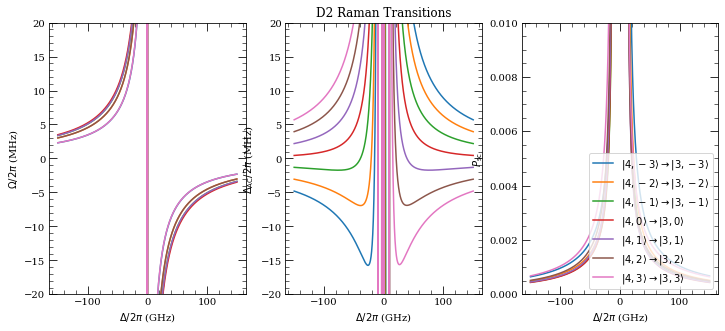

In [4]:
# Test Raman Transition Calculation
#==================================

#Laser Parameters
Pa=0.1e-3;wa=5e-6;qa=-1;
Pb=0.1e-3;wb=5e-6;qb=-1;

#Detuning Array
Delta0=-50e9*2*np.pi
Delta=np.linspace(-150,150,10000)*1e9*2*np.pi

#D1 Line
ne=6;le=1;je=0.5;f1=4; mf1=0; f0=3; mf0=0;
[OmR,AC,Psc]=cs.groundstateRamanTransition(Pa,wa,qa,Pb,wb,qb,Delta0,f0,mf0,f1,mf1,ne,le,je)
print('\nRaman Transitions |%d,%d> to |%d,%d> via %dP_%d/2' % (f1,mf1,f0,mf0,ne,je*2))
print('\tParameters:\tDelta/2pi = %2.f GHz, Pa = %1.2f mW, wa = %2.1f um, Pa = %1.2f mW, wa = %2.1f um' \
      % (Delta0/2.0/np.pi*1e-9,Pa*1e3,wa*1e6,Pb*1e3,wb*1e6))
print('\tResults:\tOmR/2pi = %2.5f MHz, AC/2pi = %2.5f MHz, Psc = %f' % (OmR/2.0/np.pi*1e-6,AC/2.0/np.pi*1e-6,Psc))

#D2 Line
ne=6;le=1;je=1.5;
[OmR,AC,Psc]=cs.groundstateRamanTransition(Pa,wa,qa,Pb,wb,qb,Delta0,f0,mf0,f1,mf1,ne,le,je)
print('\nRaman Transitions |%d,%d> to |%d,%d> via %dP_%d/2' % (f1,mf1,f0,mf0,ne,je*2))
print('\tParameters:\tDelta/2pi = %2.f GHz, Pa = %1.2f mW, wa = %2.1f um, Pa = %1.2f mW, wa = %2.1f um' \
      % (Delta0/2.0/np.pi*1e-9,Pa*1e3,wa*1e6,Pb*1e3,wb*1e6))
print('\tResults:\tOmR/2pi = %2.5f MHz, AC/2pi = %2.5f MHz, Psc = %f' % (OmR/2.0/np.pi*1e-6,AC/2.0/np.pi*1e-6,Psc))

#7P1/2
ne=7;le=1;je=0.5;Pa=10e-3;Pb=10e-3;
[OmR,AC,Psc]=cs.groundstateRamanTransition(Pa,wa,qa,Pb,wb,qb,Delta0,f0,mf0,f1,mf1,ne,le,je)
print('\nRaman Transitions |%d,%d> to |%d,%d> via %dP_%d/2' % (f1,mf1,f0,mf0,ne,je*2))
print('\tParameters:\tDelta/2pi = %2.f GHz, Pa = %1.2f mW, wa = %2.1f um, Pa = %1.2f mW, wa = %2.1f um' \
      % (Delta0/2.0/np.pi*1e-9,Pa*1e3,wa*1e6,Pb*1e3,wb*1e6))
print('\tResults:\tOmR/2pi = %2.5f MHz, AC/2pi = %2.5f MHz, Psc = %f' % (OmR/2.0/np.pi*1e-6,AC/2.0/np.pi*1e-6,Psc))

#7P3/2
ne=7;le=1;je=1.5;Pa=10e-3;Pb=10e-3;
[OmR,AC,Psc]=cs.groundstateRamanTransition(Pa,wa,qa,Pb,wb,qb,Delta0,f0,mf0,f1,mf1,ne,le,je)
print('\nRaman Transitions |%d,%d> to |%d,%d> via %dP_%d/2' % (f1,mf1,f0,mf0,ne,je*2))
print('\tParameters:\tDelta/2pi = %2.f GHz, Pa = %1.2f mW, wa = %2.1f um, Pa = %1.2f mW, wa = %2.1f um' \
      % (Delta0/2.0/np.pi*1e-9,Pa*1e3,wa*1e6,Pb*1e3,wb*1e6))
print('\tResults:\tOmR/2pi = %2.5f MHz, AC/2pi = %2.5f MHz, Psc = %f' % (OmR/2.0/np.pi*1e-6,AC/2.0/np.pi*1e-6,Psc))

#Prepare Output Figure
[f,ax]=plt.subplots(1,3,figsize=(12, 5))
ax[0].set_xlabel(r'$\Delta/2\pi$ (GHz)')
ax[0].set_ylabel(r'$\Omega/2\pi$ (MHz)')
ax[0].set_ylim([-20,20])
ax[1].set_xlabel(r'$\Delta/2\pi$ (GHz)')
ax[1].set_ylabel(r'$\Delta_\mathrm{AC}/2\pi$ (MHz)')
ax[1].set_ylim([-20,20])
ax[2].set_xlabel(r'$\Delta/2\pi$ (GHz)')
ax[2].set_ylabel(r'$P_\mathrm{sc}$')
ax[2].set_ylim([0,0.01])

#Reset to D2 Line
ne=6;le=1;je=1.5;f1=4; mf1=0; f0=3; mf0=0;
Pa=0.1e-3;wa=5e-6;qa=-1;
Pb=0.1e-3;wb=5e-6;qb=-1;

for mf in range(-3,4):
    [OmR,AC,Psc]=cs.groundstateRamanTransition(Pa,wa,qa,Pb,wb,qb,Delta,f1,mf,f0,mf+qa-qb,ne,le,je)
    ax[0].plot(Delta/(2e9*np.pi),OmR/(2e6*np.pi))
    ax[1].plot(Delta/(2e9*np.pi),AC/(2e6*np.pi))
    ax[2].plot(Delta/(2e9*np.pi),Psc,label=format("$\\vert%d,%d\\rangle\\rightarrow\\vert%d,%d\\rangle$" % (f1,mf,f0,mf)))
ax[2].legend(loc=4)
ax[1].set_title('D2 Raman Transitions')
plt.show()

## Two-photon Rydberg excitation

<img src="doc/twophotonexcitation.png" width=150/>

We consider here the case of two-photon ground-state Raman transitions from $\vert g \rangle = \vert f_g,m_{f_g}\rangle$ to $\vert r \rangle = \vert n_r,l_r,j_r,m_{j_r}\rangle$ via an intermediate excited state $\vert e\rangle = \vert f_e,m_{f_e}\rangle$. In the rotating wave approximation, the Hamiltonian can be written as

\begin{equation}
\mathcal{H} = \hbar\begin{pmatrix} 0 & \Omega_p/2 & 0 \\\Omega_p/2 & -\Delta_p & \Omega_c/2 \\ 0 & \Omega_c/2 & -\delta\end{pmatrix},
\end{equation}

where $\Omega_p$ is the Rabi frequency from $\vert 0\rangle\rightarrow\vert e\rangle$ due to the probe laser and $\Omega_c$ is the Rabi frequency from $\vert e\rangle\rightarrow\vert r\rangle$ due to the coupling laser, $\delta=(\Delta_p+\Delta_c)$ is the two-photon detuning.

In the limit $\Delta_p \gg \Omega_p,\Omega_c,\Gamma_e$ the intermediate excited state can be adiabatically elliminiated leading to an effective two-photon Rabi frequency $\Omega_R = \Omega_p\Omega_c/2\Delta$ and an effective detuning 
$\delta_\mathrm{eff}=\delta+\Delta_\mathrm{AC}$ where $\Delta_\mathrm{AC}$ is the differential Stark shift given by

\begin{equation}
\Delta_\mathrm{AC} = \frac{\vert\Omega_p\vert^2}{4\Delta_p} - \frac{\vert\Omega_c\vert^2}{4\Delta_c}.
\end{equation}

On the two-photon transition ($\delta_\mathrm{eff}=0$), the probability of spontanteous emission during a $\pi$-pulse can be evaluated from $P_\mathrm{sc}=\Gamma_e\rho_e\tau_\pi$, where $\tau_\pi=\pi/\Omega_R$ is the $\pi$-pulse duration and $\rho_e$ is the excited state population given by

\begin{equation}
\rho_e = \frac{1}{2}\left(\frac{\vert\Omega_p\vert^2}{2\Delta_p^2}+\frac{\vert\Omega_c\vert^2}{2\Delta_c^2}\right).
\end{equation}

For a multi-level atom, the terms describing Raman transition, diffrential AC Stark shift and scattering probability must be calculated by summing over the $\vert f_e,m_{f_e}\rangle$ states of the intermediate excited state. Additionally, for transitions between hyperfine ground states separated by frequency $\omega_{01}$ we must also account for the off-resonant AC Stark shift and scattering terms arising from laser A acting on $\vert 1 \rangle$ with detuning $\Delta'=\Delta+\omega_{01}$ and laser B acting on $\vert 0 \rangle$ with detuning $\Delta'=\Delta-\omega_{01}$. 

\begin{align}
\Omega_R&=\displaystyle\sum_{f_e,m_{f_e}}\frac{\Omega_p^{g\rightarrow f_e}\Omega_c^{f_e\rightarrow r}}{2(\Delta-\Delta_{f_e})}\\
\Delta_{\mathrm{AC}_g} &= \displaystyle\sum_{f_e,m_{f_e}}\frac{\vert\Omega_p^{g\rightarrow f_e}\vert^2}{4(\Delta-\Delta_{f_e})}\\
\Delta_{\mathrm{AC}_r} &= \displaystyle\sum_{f_e,m_{f_e}}\frac{\vert\Omega_c^{f_e\rightarrow r}\vert^2}{4(\Delta-\Delta_{f_e})}\\
P_\mathrm{sc} &= \frac{\Gamma_et_\pi}{2}\displaystyle\sum_{f_e,m_{f_e}}\left[\frac{\vert\Omega_p^{g\rightarrow f_e}\vert^2}{2(\Delta-\Delta_{f_e})^2}+\frac{\vert\Omega_c^{f_e\rightarrow r}\vert^2}{2(\Delta-\Delta_{f_e})^2}\right]
\end{align}

### ARC Implementation

 + [OmegaR,ACg,ACr,Psc] = twoPhotonRydbergExcitation(Pp,wp,qp,Pc,wc,qc,Delta,fg,mfg,ne,le,je,nr,lr,jr,mjr)
 
    Returns two-photon Rabi frequency $\Omega_R$, ground-state AC Starkshift $\Delta_\mathrm{AC_g}$, Rydberg-state AC Starkshift $\Delta_\mathrm{AC_r}$ and scattering probability $P_\mathrm{sc}$ for transition from $\vert f_g,m_{f_g}\rangle\rightarrow n_rL_{j_r}\vert j_r,m_{j_r}\rangle$ via intermediate excited state with quantum numbers $n_e,\ell_e,j_e$ with detuning $\Delta$ from excited state centre of mass driven by probe/coupling lasers with power $P$, waist $w$ and polarisation $q$ driving transitions from $\vert g\rangle,\vert r\rangle$ respectively.

In [5]:
#Rydberg Excitation vs 6P3/2
Pp=500e-9;wp=3e-6;qp=1;
Pc=200e-3;wc=5e-6;qc=-1;
#Ground State
fg=4;mfg=0;
#Excited state (6P3/2)
ne=6;le=1;je=1.5;
#Rydberg state (82S1/2)
nr=80;lr=0;jr=0.5;mjr=-0.5;

#Detuning Array
Delta0=1.1e9*2*np.pi
Delta=np.linspace(-2.5,2.5,1001)*1e9*2*np.pi

[OmR,ACg,ACr,Psc]=cs.twoPhotonRydbergExcitation(Pp,wp,qp,Pc,wc,qc,Delta0,fg,mfg,ne,le,je,nr,lr,jr,mjr)
print('\nRydberg Excitation 6S1/2 |%d,%d> to %d%c |%d/2,%d/2> via %dP_%d/2' % (fg,mfg,nr,SPD[lr],2*jr,2*mjr,ne,je*2))
print('\n\tParameters:\tDelta/2pi = %2.2f GHz, Pp = %1.2f uW, wp = %2.1f um, qp=%d, Pc = %1.2f mW, wc = %2.1f um, qc=%d' \
      % (Delta0/2.0/np.pi*1e-9,Pp*1e6,wp*1e6,qp,Pc*1e3,wc*1e6,qc))
print('\n\tResults:\tOmR/2pi = %2.5f MHz\n\t\t\tACg/2pi = %2.5f MHz\n\t\t\tACr/2pi = %2.5f MHz\n\t\t\tDelta_AC/2pi = %2.5f MHz\n\t\t\tPsc = %f' \
      % (OmR/2.0/np.pi*1e-6,ACg/2.0/np.pi*1e-6,ACr/2.0/np.pi*1e-6,(ACg-ACr)/2.0/np.pi*1e-6,Psc))

#Prepare Output Figure
[f,ax]=plt.subplots(1,3,figsize=(16, 5))
ax[0].set_xlabel(r'$\Delta/2\pi$ (GHz)')
ax[0].set_ylabel(r'$\Omega/2\pi$ (MHz)')
ax[0].set_ylim([-10,10])
ax[1].set_xlabel(r'$\Delta/2\pi$ (GHz)')
ax[1].set_ylabel(r'$\Delta_\mathrm{AC}/2\pi$ (MHz)')
ax[1].set_ylim([-20,20])
ax[2].set_xlabel(r'$\Delta/2\pi$ (GHz)')
ax[2].set_ylabel(r'$P_\mathrm{sc}$')
ax[2].set_ylim([0,0.25])
ax[0].plot(Delta/(2e9*np.pi),0*Delta,'k--')
ax[1].plot(Delta/(2e9*np.pi),0*Delta,'k--')

SPD='SPD'

mj=-jr-1
for m in range(int(2*jr+1)):
    mj+=1
    for mfg in [-fg,0,fg]:
        [OmR,ACg,ACr,Psc]=cs.twoPhotonRydbergExcitation(Pp,wp,qp,Pc,wc,qc,Delta,fg,mfg,ne,le,je,nr,lr,jr,mj)
        if(np.sum(np.abs(OmR))>0.1):
            ax[0].plot(Delta/(2e9*np.pi),OmR/(2e6*np.pi))
            ax[1].plot(Delta/(2e9*np.pi),(ACg-ACr)/(2e6*np.pi))
            ax[2].plot(Delta/(2e9*np.pi),Psc,label=format("$\\vert%d,%d\\rangle\\rightarrow%d%c\\vert%1.0f/2,%1.0f/2\\rangle$" \
                                                      % (fg,mfg,nr,SPD[lr],2*jr,2*mj)))
ax[2].legend(loc=1)
ax[1].set_title('Rydberg excitation 6S_{1/2} -> %dP_{%1.f/2} -> %d%c_{%1.0f/2}'%(ne,2*je,nr,SPD[lr],2*jr))


plt.show()

NameError: name 'SPD' is not defined

In [ ]:
#Rydberg Excitation vs 7P1/2
Pp=1.535e-3;wp=5e-6;qp=1;
Pc=20e-3;wc=3e-6;qc=-1;
#Ground State
fg=4;mfg=0;
#Excited state (7P1/2)
ne=7;le=1;je=0.5;
#Rydberg state (82S1/2)
nr=80;lr=0;jr=0.5;mjr=-0.5;

#Detuning Array
Delta0=1e9*2*np.pi
Delta=np.linspace(-2.5,2.5,1001)*1e9*2*np.pi

[OmR,ACg,ACr,Psc]=cs.twoPhotonRydbergExcitation(Pp,wp,qp,Pc,wc,qc,Delta0,fg,mfg,ne,le,je,nr,lr,jr,mjr)
print('\nRydberg Excitation 6S1/2 |%d,%d> to %d%c |%d/2,%d/2> via %dP_%d/2' % (fg,mfg,nr,SPD[lr],2*jr,2*mjr,ne,je*2))
print('\n\tParameters:\tDelta/2pi = %2.2f GHz, Pp = %1.2f uW, wp = %2.1f um, qp=%d, Pc = %1.2f mW, wc = %2.1f um, qc=%d' \
      % (Delta0/2.0/np.pi*1e-9,Pp*1e6,wp*1e6,qp,Pc*1e3,wc*1e6,qc))
print('\n\tResults:\tOmR/2pi = %2.5f MHz\n\t\t\tACg/2pi = %2.5f MHz\n\t\t\tACr/2pi = %2.5f MHz\n\t\t\tDelta_AC/2pi = %2.5f MHz\n\t\t\tPsc = %f' \
      % (OmR/2.0/np.pi*1e-6,ACg/2.0/np.pi*1e-6,ACr/2.0/np.pi*1e-6,(ACg-ACr)/2.0/np.pi*1e-6,Psc))

#Prepare Output Figure
[f,ax]=plt.subplots(1,3,figsize=(16, 5))
ax[0].set_xlabel(r'$\Delta/2\pi$ (GHz)')
ax[0].set_ylabel(r'$\Omega/2\pi$ (MHz)')
ax[0].set_ylim([-10,10])
ax[1].set_xlabel(r'$\Delta/2\pi$ (GHz)')
ax[1].set_ylabel(r'$\Delta_\mathrm{AC}/2\pi$ (MHz)')
ax[1].set_ylim([-20,20])
ax[2].set_xlabel(r'$\Delta/2\pi$ (GHz)')
ax[2].set_ylabel(r'$P_\mathrm{sc}$')
ax[2].set_ylim([0,0.25])
ax[0].plot(Delta/(2e9*np.pi),0*Delta,'k--')
ax[1].plot(Delta/(2e9*np.pi),0*Delta,'k--')

SPD='SPD'

mj=-jr-1
for m in range(int(2*jr+1)):
    mj+=1
    for mfg in [-fg,0,fg]:
        [OmR,ACg,ACr,Psc]=cs.twoPhotonRydbergExcitation(Pp,wp,qp,Pc,wc,qc,Delta,fg,mfg,ne,le,je,nr,lr,jr,mj)
        if(np.sum(np.abs(OmR))>0.1):
            ax[0].plot(Delta/(2e9*np.pi),OmR/(2e6*np.pi))
            ax[1].plot(Delta/(2e9*np.pi),(ACg-ACr)/(2e6*np.pi))
            ax[2].plot(Delta/(2e9*np.pi),Psc,label=format("$\\vert%d,%d\\rangle\\rightarrow%d%c\\vert%1.0f/2,%1.0f/2\\rangle$" \
                                                      % (fg,mfg,nr,SPD[lr],2*jr,2*mj)))
ax[2].legend(loc=1)
ax[1].set_title('Rydberg excitation 6S_{1/2} -> %dP_{%1.f/2} -> %d%c_{%1.0f/2}'%(ne,2*je,nr,SPD[lr],2*jr))


plt.show()

## Magnetic Functions

 + getLandegj(l,j,s=0.5)
 
    Returns fine-structure Landé g-factor $g_J$
 
\begin{equation}
g_J\simeq 1+\frac{j(j+1)+s(s+1)-l(l+1)}{2j(j+1)}
\end{equation}

 + getLandegjExact(l,j,s=0.5)
 
    Returns fine-structure Landé g-factor $g_J$ using precise $g_L,$ $g_S$ values
 
\begin{equation}
g_J=g_L\frac{j(j+1)-s(s+1)+l(l+1)}{2j(j+1)}+g_S\frac{j(j+1)+s(s+1)-l(l+1)}{2j(j+1)}
\end{equation}

 + getLandegf(l,j,f,s=0.5)
 
    Returns hyperfine-structure Landé g-factor $g_F$
 
\begin{equation}
g_F\simeq g_J\frac{f(f+1)-I(I+1)+j(j+1)}{2f(f+1)}
\end{equation}

 + getLandegfExact(l,j,f,s=0.5)
 
    Returns hyperfine-structure Landé g-factor $g_F$ using precise $g_L,$ $g_S$, $g_I$ values
 
\begin{equation}
g_F=g_J\frac{f(f+1)-I(I+1)+j(j+1)}{2f(f+1)}+g_I\frac{f(f+1)+I(I+1)-j(j+1)}{2f(f+1)}
\end{equation}
